In [1]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from sklearn.model_selection import KFold
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import nltk
import pickle
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#pip install plot_keras_history

In [4]:
from plot_keras_history import plot_history
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
cd /content/gdrive/MyDrive/Colab Notebooks/pandemic

/content/gdrive/MyDrive/Colab Notebooks/pandemic


In [7]:
df= pd.read_csv('./panda.csv')
#df
X= df[df.columns[:8]].values
# y= df[['Electricity:Facility','Photovoltaic:ElectricityProduced','ElectricityPurchased:Facility']].values
y= df[['Electricity:Facility','Photovoltaic:ElectricityProduced']].values

In [9]:
#df

In [ ]:
# #y.mean(axis=0)
# y.min(axis=0)
# y.max(axis=0)

In [10]:
# created scaler
scaler_x = StandardScaler()
# fit scaler on training dataset
scaler_x.fit(X)
# transform dataset
X_scaled = scaler_x.transform(X)

# created scaler
scaler_y = StandardScaler()
# fit scaler on training dataset
scaler_y.fit(y)
# transform dataset
y_scaled = scaler_y.transform(y)

In [11]:
# split into train and test
n_train = 150
trainX, testX = X_scaled[:n_train, :], X_scaled[n_train:, :]
trainy, testy = y_scaled[:n_train], y_scaled[n_train:]

In [12]:
trainX, testX, trainy, testy = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=1)

In [13]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [14]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
# Create the SVR regressor
svr = SVR(epsilon=0.1)

In [16]:
# Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)

In [17]:
# Train the regressor
mor = mor.fit(trainX, trainy)

# Generate predictions for testing data
y_pred = mor.predict(testX)

# Evaluate the regressor
mse_one = mean_squared_error(testy[:,0], y_pred[:,0],squared=False)
mse_two = mean_squared_error(testy[:,1], y_pred[:,1],squared=False)
# mse_three = mean_squared_error(testy[:,2], y_pred[:,2],squared=False)
#print(f'RMSE for first regressor: {mse_one} - second regressor: {mse_two} - Third regressor: {mse_three}')
mae_one = mean_absolute_error(testy[:,0], y_pred[:,0])
mae_two = mean_absolute_error(testy[:,1], y_pred[:,1])
# mae_three = mean_absolute_error(testy[:,2], y_pred[:,2])
#print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three}')

In [18]:
# get the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(512, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
#     model.add(Dense(4,activation='relu'))
    #model.add(Dense(4,activation='relu'))
    model.add(Dense(n_outputs))

    optimizer = tf.keras.optimizers.Adam(0.00001)

    model.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics = [r2_keras])
#     model.compile(loss=root_mean_squared_error, optimizer=SGD(lr=0.01, momentum=0.9))
    return model

In [19]:

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

# Merge inputs and targets
inputs = np.concatenate((trainX, testX), axis=0)
targets = np.concatenate((trainy, testy), axis=0)


n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model

for train, test in kfold.split(inputs, targets):
    model = get_model(n_inputs, n_outputs)
    # fit the model on all data
    history= model.fit(X_scaled[train], y_scaled[train],verbose=1, epochs=2000)
    # evaluate the model
    train_mse = model.evaluate(X_scaled[train], y_scaled[train], verbose=0)
    test_mse = model.evaluate(X_scaled[test], y_scaled[test], verbose=0)

    #print('Fold: %.1f, Train: %.3f, Test: %.3f' % (fold_no, train_mse, test_mse))
    # # plot loss during training
    # pyplot.title('Root Mean Squared Error')
    # pyplot.plot(history.history['loss'], label='train')
    # #pyplot.plot(history.history['val_loss'], label='test')
    # pyplot.legend()
    # pyplot.show()
    # Increase fold number
    fold_no = fold_no + 1


Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 0s 9ms/step - loss: 0.0075 - r2_keras: 0.9999
Epoch 1502/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.0072 - r2_keras: 0.9999
Epoch 1503/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.0067 - r2_keras: 1.0000
Epoch 1504/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.0062 - r2_keras: 1.0000
Epoch 1505/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.0060 - r2_keras: 1.0000
Epoch 1506/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.0063 - r2_keras: 1.0000
Epoch 1507/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.0067 - r2_keras: 1.0000
Epoch 1508/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.0066 - r2_keras: 0.9999
Epoch 1509/2000
5/5 [==============================] - 0s 11ms/step - loss: 0.0071 - r2_keras: 0.9999
Epoch 1510/2000
5/5 [==============================]

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0a164f450>,
       dtype=object))

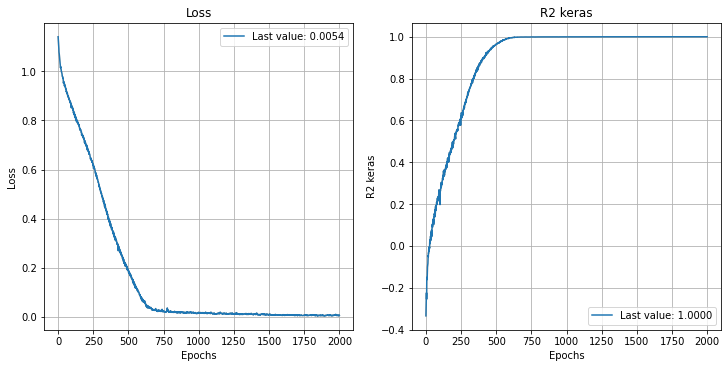

In [ ]:
plot_history(history)

In [ ]:
pred= scaler_y.inverse_transform(model.predict(testX))
compY = scaler_y.inverse_transform(testy)

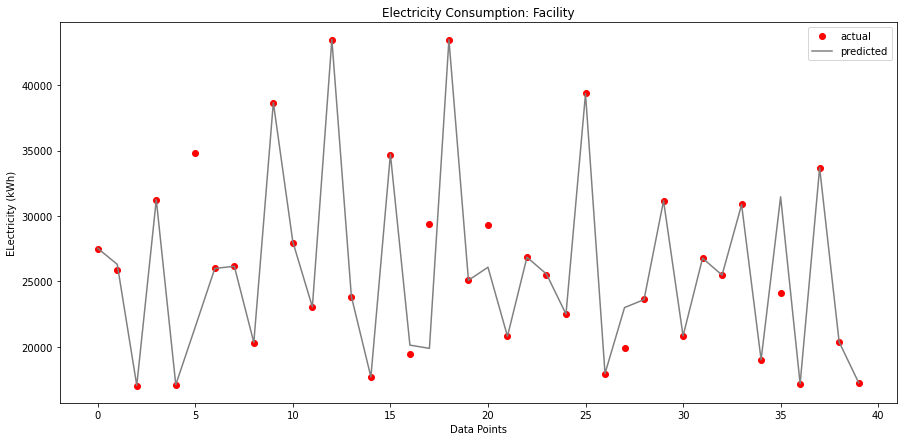

In [ ]:
# g=plt.scatter(y[:,1],predicted_y[:,1])
#'Electricity:Facility','Photovoltaic:ElectricityProduced','ElectricityPurchased:Facility'
plt.rcParams["figure.figsize"] = (15,7)
plt.title('Electricity Consumption: Facility')
plt.ylabel('ELectricity (kWh)')
plt.xlabel('Data Points')
plt.plot(compY[:,0], 'or',label='actual')
plt.plot(pred[:,0], '-', color='gray',label='predicted')
#plt.xlim(-1, 21)
plt.legend()
plt.show()

In [ ]:
def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions, color='red')
  plt.xlabel('True Values [kWh]')
  plt.ylabel('Predictions [kWh]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

In [ ]:
plt.scatter(compY[:,0], pred[:,0], color='red')
plt.plot(np.unique(compY[:,0]), np.poly1d(np.polyfit(compY[:,0], pred[:,0], 1))(np.unique(compY[:,0])))
plt.title('Correlation of Actual and Predicted Consumptions')
plt.xlabel('Actual Electical Consumption [kWh]')
plt.ylabel('Predicted Electrical Consumption [kWh]')

Text(0, 0.5, 'Predicted Electrical Consumption [kWh]')

# save model

In [ ]:
#saving weights and model
model.save("./my_model")

#save scaler
with open("my_scaler_x.pkl","wb") as f:
    pickle.dump(scaler_x, f)

with open("my_scaler_y.pkl","wb") as f:
    pickle.dump(scaler_y, f)

INFO:tensorflow:Assets written to: ./my_model/assets


# test

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./my_model",compile=False)

#load scaler
with open("my_scaler_x.pkl","rb") as f:
    loaded_scaler_x= pickle.load(f)

with open("my_scaler_y.pkl","rb") as f:
    loaded_scaler_y= pickle.load(f)

In [ ]:
#let's check
pred= loaded_scaler_y.inverse_transform(reconstructed_model.predict(testX))